<a id = '4.0'></a>
<p style = "font-size : 30px; color : #34656d ;  text-align : center; background-color : #08f9f9; border-radius: 5px 5px;">Support Vector Machines - Explaining Hyper Parameters PostClass</p> 

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.float_format", lambda x: "%.3f" % x)
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
df = pd.read_csv("mouse_viral_study.csv")

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508,8.583,0
1,4.126,3.073,1
2,6.428,6.370,0
3,3.673,4.905,1
4,1.580,2.441,1


In [4]:
df.shape

(400, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


## Separating Hyperplane Manually

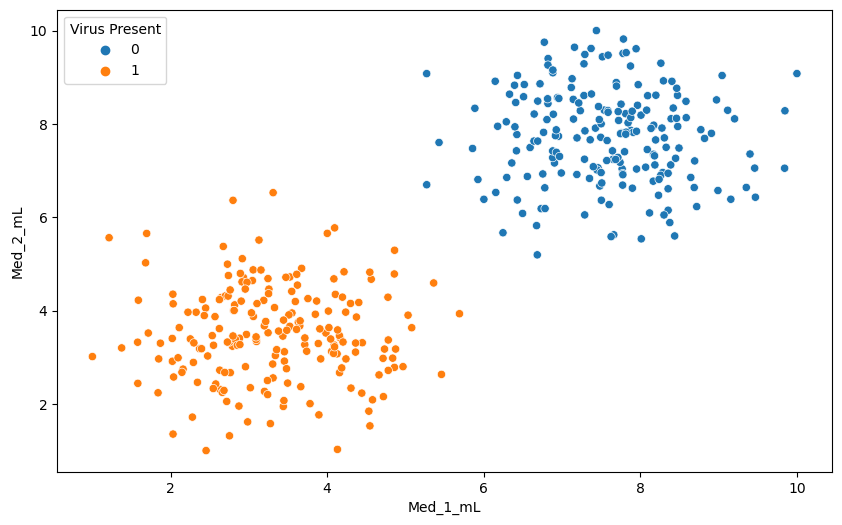

In [14]:
sns.scatterplot(x="Med_1_mL", y="Med_2_mL", hue="Virus Present", data=df);

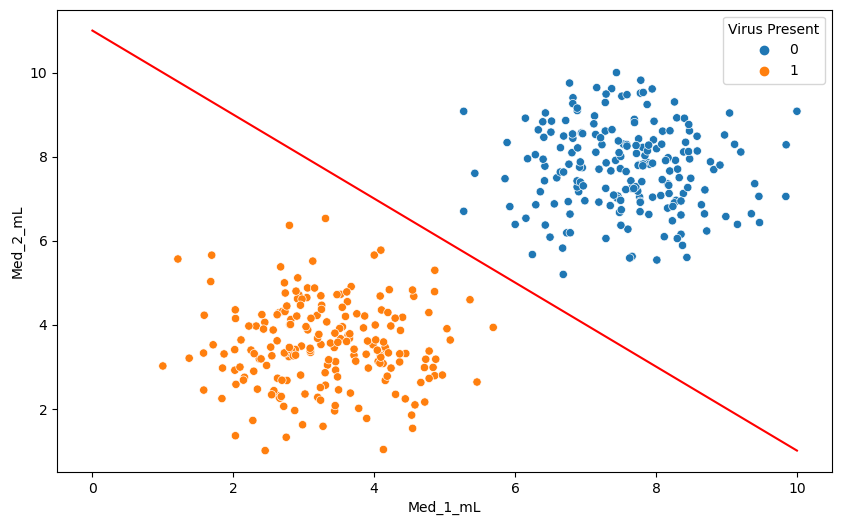

In [15]:
sns.scatterplot(x="Med_1_mL", y="Med_2_mL", hue="Virus Present", data=df)

x = np.linspace(0, 10, 100)
m = -1
b = 11
y = m * x + b
plt.plot(x, y, "red")

## SVM - Support Vector Machine

In [16]:
from sklearn.svm import SVC

In [17]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

**NOTE: For this example, we will explore the algorithm, so we'll skip any scaling or even a train\test split for now**

In [19]:
X = df.drop(columns="Virus Present")
y = df["Virus Present"]

In [20]:
from svm_margin_plot import plot_svm_boundary

In [21]:
model = SVC(kernel="linear", C=0.9)
model.fit(X, y)

SVC(C=0.9, kernel='linear')

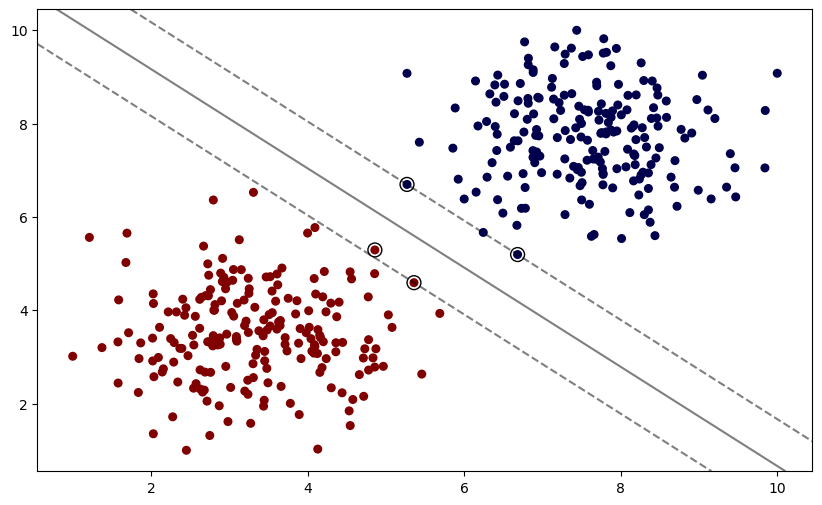

In [22]:
plot_svm_boundary(model, X, y)

## Hyper Parameters

### C

Regularization parameter. The strength of the regularization is **inversely** proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.


In [23]:
model = SVC(kernel="linear", C=0.1)
model.fit(X, y)

SVC(C=0.1, kernel='linear')

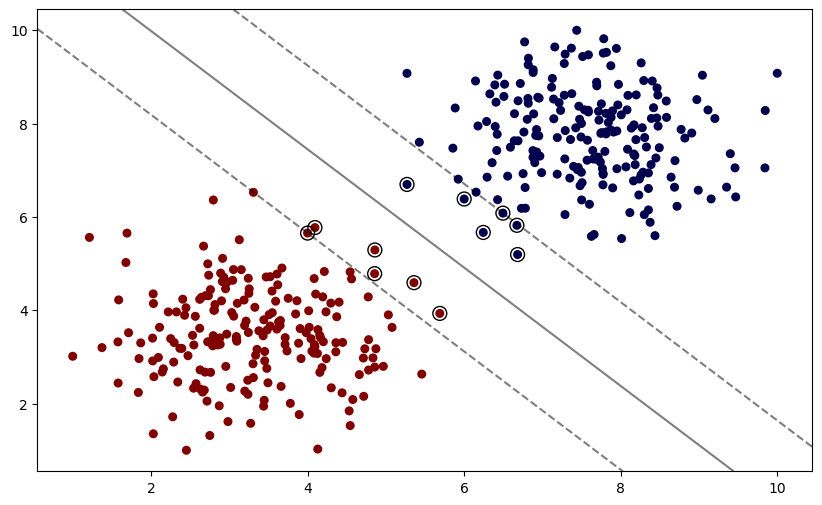

In [24]:
plot_svm_boundary(model,X,y)

### Kernel

Kernel Function is a method used to take data as input and transform into the required form of processing data. “Kernel” is used due to set of mathematical functions used in Support Vector Machine provides the window to manipulate the data. So, Kernel Function generally transforms the training set of data so that a non-linear decision surface is able to transformed to a linear equation in a higher number of dimension spaces. Basically, It returns the inner product between two points in a standard feature dimension.

[Choosing a Kernel](https://stats.stackexchange.com/questions/18030/how-to-select-kernel-for-svm?rq=1)

#### rbf - [Radial Basis Function](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)


When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. 

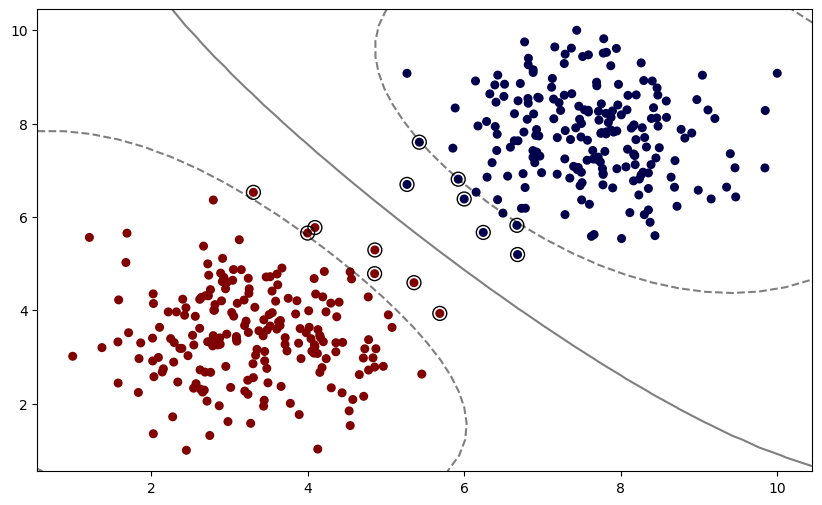

In [43]:
model = SVC(kernel='rbf', C=1, gamma=0.04)
model.fit(X, y)
plot_svm_boundary(model,X,y)

### gamma

gamma : {'scale', 'auto'} or float, default='scale'
    Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.

    - if ``gamma='scale'`` (default) is passed then it uses
      1 / (n_features * X.var()) as value of gamma,
    - if 'auto', uses 1 / n_features.

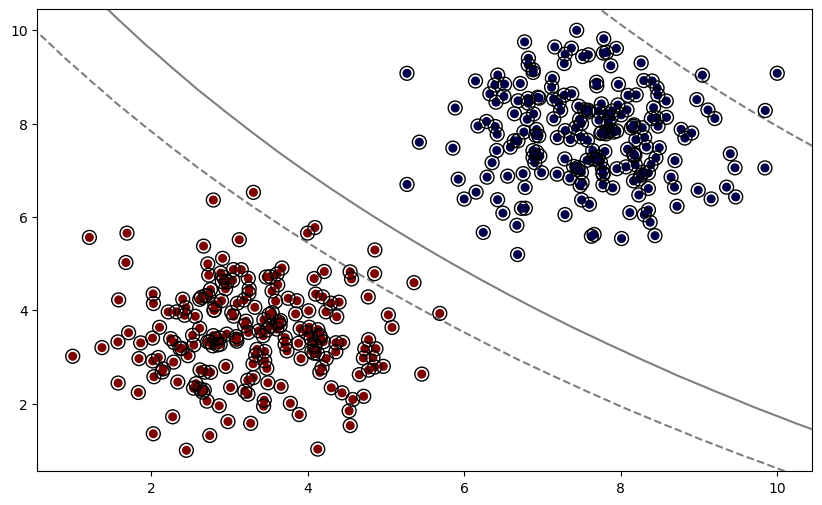

In [44]:
model = SVC(kernel='sigmoid')
model.fit(X, y)
plot_svm_boundary(model,X,y)

#### Degree (poly kernels only)

Degree of the polynomial kernel function ('poly').
Ignored by all other kernels.

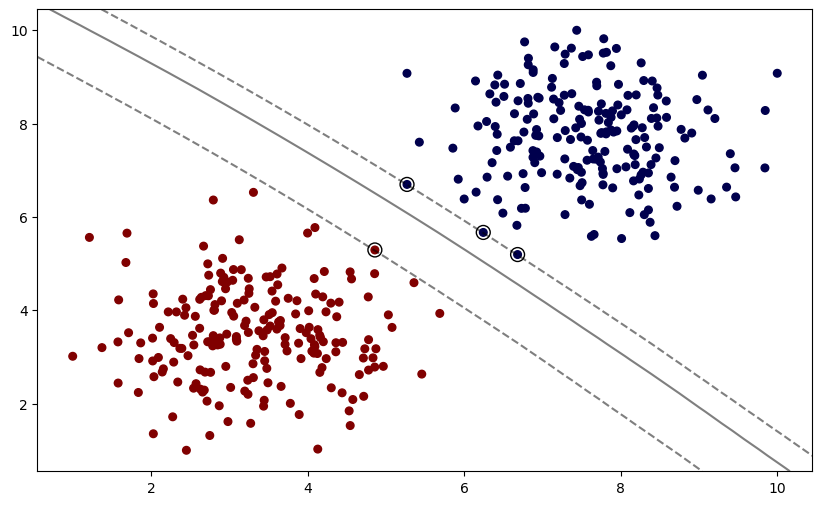

In [58]:
model = SVC(kernel='poly', C=1, degree=10)
model.fit(X, y)
plot_svm_boundary(model,X,y)

## Grid Search

Keep in mind, for this simple example, we saw the classes were easily separated, which means each variation of model could easily get 100% accuracy, meaning a grid search is "useless".

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
svm = SVC()
param_grid = {
    "C" : [0.0001, 0.01, 0.1],
    "kernel" : ["linear", "rbf", "sigmoid", "poly"],
    "gamma" : ["scale", "auto"],
    "degree" : [1, 2]
}

grid_model = GridSearchCV(estimator=svm, param_grid=param_grid)

In [61]:
grid_model.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.0001, 0.01, 0.1], 'degree': [1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [63]:
grid_model.best_score_

1.0

In [64]:
grid_model.best_params_

{'C': 0.0001, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}